In [41]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
class Net:
    
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.inodes = input_nodes
        self.hnodes = hidden_nodes
        self.onodes = output_nodes
        self.lr = learning_rate
        self.wih = (np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes,self.inodes)))
        self.who = (np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes,self.hnodes)))
        
        self.activation = lambda x: scipy.special.expit(x)
        pass
    
    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation(hidden_inputs)
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.who.T, output_errors)
        self.who += self.lr*np.dot((output_errors*final_outputs*(1-final_outputs)),np.transpose(hidden_outputs))
        self.wih += self.lr*np.dot((hidden_errors*hidden_outputs*(1-hidden_outputs)),np.transpose(inputs))
        
        pass
    
    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation(hidden_inputs)
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation(final_inputs)
        
        return final_outputs

In [49]:
n = Net(784, 100, 10, 0.3)

In [50]:
df = open('mnist_train_100.csv', 'r')
dl = df.readlines()
df.close()

In [51]:
#all_values = dl[0].split(',')
#img = np.asfarray(all_values[1:]).reshape((28,28))
#plt.imshow(img, cmap='Greys')

In [52]:
#scaled = np.asfarray(all_values[1:]) / 255. * .99 + .01

In [53]:
for shot in dl:
    all_values = shot.split(',')
    scaled = np.asfarray(all_values[1:]) / 255. * .99 + .01
    targets = np.zeros(10) + .01
    targets[int(all_values[0])] = .99
    n.train(scaled, targets)

In [54]:
cf = open('mnist_test_10.csv', 'r')
cl = cf.readlines()
cf.close()

4


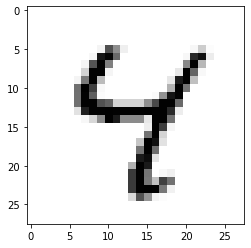

In [69]:
all_values = cl[6].split(',')
img = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(img, cmap='Greys')
print(all_values[0])

In [70]:
scaled = np.asfarray(all_values[1:]) / 255. * .99 + .01
print(n.query(scaled))

[[0.01150305]
 [0.00530248]
 [0.00681337]
 [0.17676149]
 [0.33137625]
 [0.04569233]
 [0.03026211]
 [0.35889755]
 [0.03054243]
 [0.10209228]]
